[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 328
    # variables        = 3
    chi-square         = 59008884.7
    reduced chi-square = 181565.799
    Akaike info crit   = 3974.86067
    Bayesian info crit = 3986.23971
[[Variables]]
    amp:  18.9088602 +/- 800.877317 (4235.46%) (init = 5)
    cen:  5.05722981 +/- 37.4698860 (740.92%) (init = 5)
    wid:  0.69592163 +/- 29.0424260 (4173.23%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.570
    C(cen, wid) = -0.129


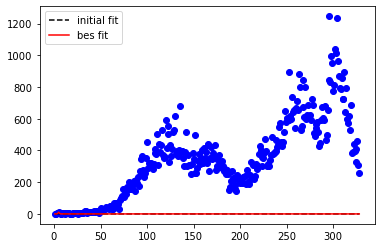

In [31]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
import numpy as np

from lmfit import Model
from lmfit.models import ExponentialModel, GaussianModel

import csv

x = []
y = []
with open('./data/data_gto.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        x.append(float(row['dia']))
        y.append(float(row['casos diarios']))

#data = loadtxt('./data/data.dat')
#x = data[:, 0]
#y = data[:, 1]

#print(y)

def gaussian(x, amp, cen, wid):
    #1-d gaussian: gaussian(x, amp, cen, wid)
    res = (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))
    return res

gauss1 = GaussianModel(prefix='g1_')
gmodel = Model(gaussian)
xfit = np.linspace(0,500)
result = gmodel.fit(y, x=x, cen=5, amp=5, wid=1)
a=result.eval(x=xfit)

print(result.fit_report())


plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='bes fit')
#plt.plot(xfit, a, 'r-', label='Predict')
plt.legend(loc='best')
plt.savefig('foo.png', bbox_inches='tight',  dpi=10 * 10)
plt.show()

[3.33512102e+05 3.96438551e+02 1.80033179e+02]


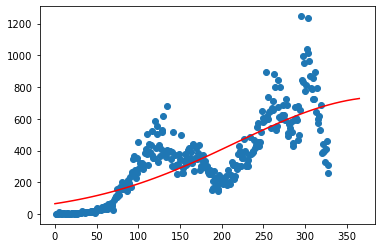

In [36]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, amp, cen, wid):
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

res, cov = curve_fit(func,x,y)

print(res)
xx = np.linspace(0,365)
#print(xx)
fig, axes = plt.subplots()
axes.scatter(x,y)
axes.plot(xx,func(xx,3.33512102e+05,3.96438551e+02,1.80033179e+02),'r-', label='bes fit')
plt.savefig('jl.png', bbox_inches='tight',  dpi=10 * 10)
plt.show()

No handles with labels found to put in legend.


[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 101
    # variables        = 8
    chi-square         = 322.353733
    reduced chi-square = 3.46616917
    Akaike info crit   = 133.213426
    Bayesian info crit = 154.134391
##  Warning: uncertainties could not be estimated:
    exp_amplitude:  at initial value
    exp_decay:      at initial value
    g1_amplitude:   at initial value
    g1_center:      at initial value
    g1_sigma:       at initial value
    g2_amplitude:   at initial value
    g2_center:      at initial value
    g2_sigma:       at initial value
[[Variables]]
    exp_amplitude:  0.11519110 (init = 0.1151911)
    exp_decay:     -5.59768709 (init = -5.597687)
    g1_amplitude:   2000.00000 (init = 2000)
    g1_center:      105.000000 (init = 105)
    g1_sigma:       15.0000000 (init = 15)
    g1_fwhm

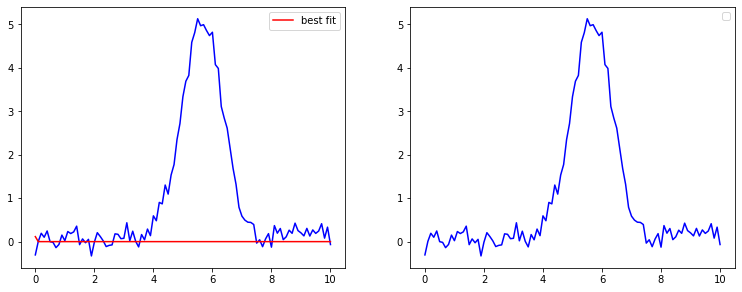

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import ExponentialModel, GaussianModel

#dat = np.loadtxt('./data/data.dat')
#x = dat[:, 1]
#y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=105, min=75, max=125)
pars['g1_sigma'].set(value=15, min=3)
pars['g1_amplitude'].set(value=2000, min=10)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=155, min=125, max=175)
pars['g2_sigma'].set(value=15, min=3)
pars['g2_amplitude'].set(value=2000, min=10)

mod = gauss1 + gauss2 + exp_mod

#init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
#axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

#comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
#axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
#axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
#axes[1].plot(x, comps['exp_'], 'k--', label='Exponential component')
axes[1].legend(loc='best')

plt.show()